### Embeddings and CLustering 

1. Extract sentence based embeddings for each phrase or user_msg
2. clustering based on the embeddings
3. visualizing using t-SNE

Results: based on the analysis we can say that the right number of topics for unlabelled dataset are between 25-35

In [57]:
import pandas as pd
import numpy as np
from utils import Dataset, Preprocessing
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import HDBSCAN

For clustering algorithms like K-Mean finding the right number of clusters is important. So, to approximiate the number of clusters, Elbow method is widely used. we will use here too to find the right number which would also be number of topics

In [ ]:
def plot_elbow(embeddings, test_clusters=40):

    # Assuming `embeddings` is our (1525, 1024) numpy array
    scores = []
    for i in range(1, test_clusters):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(embeddings)
        scores.append(kmeans.inertia_)

    # Plotting the Elbow Method graph
    plt.plot(range(1, test_clusters), scores)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    

First run whole excercise on on labeled data to see how it works

In [3]:
data_obj = Dataset() 

# get labelled data
train_df = data_obj.get_labelled_data()
process_obj = Preprocessing()

cleaned_train_df = process_obj.get_preprocessd_data(train_df, text_column="phrase", has_labels = True)

train_phrases = cleaned_train_df["phrase"].values.tolist()
# train_phrases

Extracting sentence based embeddings for each phrase

In [4]:
model_name = 'intfloat/multilingual-e5-large'
model = SentenceTransformer(model_name)

# Example sentences
# sentences = ["Dit is een voorbeeldzin.", "Elke zin wordt omgezet."]

# Generate embeddings
embeddings = model.encode(train_phrases)

print(embeddings.shape)

(1525, 1024)


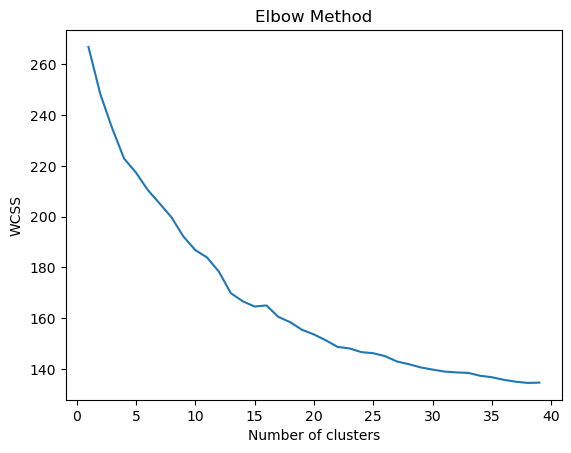

In [15]:
plot_elbow(embeddings, test_clusters=40)

Based on the elbow method we can see the appropriate range of clusters can between 20-25. Now apply clustering method for 25 clusters and visualize it using tSNE

/Users/zaheerbabar/miniforge3/envs/NLP-transformer/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


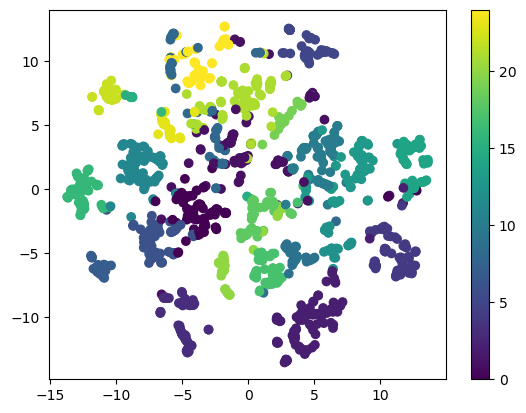

In [18]:

# # Apply t-SNE
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)
# embeddings_2d = tsne.fit_transform(embeddings)

# # Apply K-Means on the 2D embeddings
kmeans = KMeans(n_clusters=25, random_state=0).fit(embeddings)
labels = kmeans.labels_

# Apply t-SNE on the original embeddings
tsne = TSNE(n_components=2, perplexity=15, n_iter=300, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings)

# Plotting the result
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()


No do the same excercise for unlabelled data

In [19]:
test_df = data_obj.get_unlabelled_data()

cleaned_test_df = process_obj.get_preprocessd_data(test_df, text_column="user_msg", has_labels = False)

test_phrases = cleaned_test_df['cleaned_text']
# Generate embeddings
test_embeddings = model.encode(test_phrases)

print(test_embeddings.shape)

(3791, 1024)


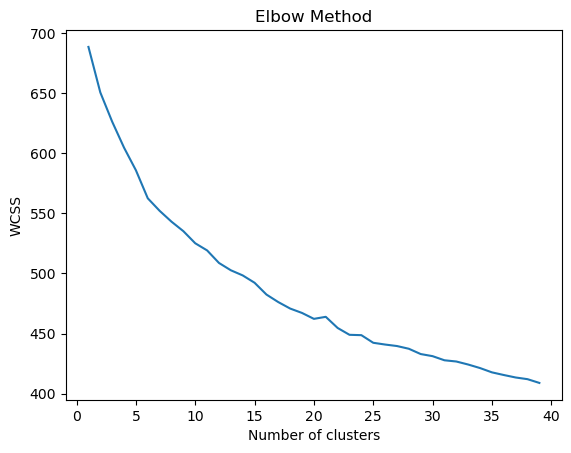

In [20]:
# Assuming `embeddings` is our (1525, 1024) numpy array
plot_elbow(test_embeddings, test_clusters=40)

Based on the elbow method we can say the number of clusters are between 25-30

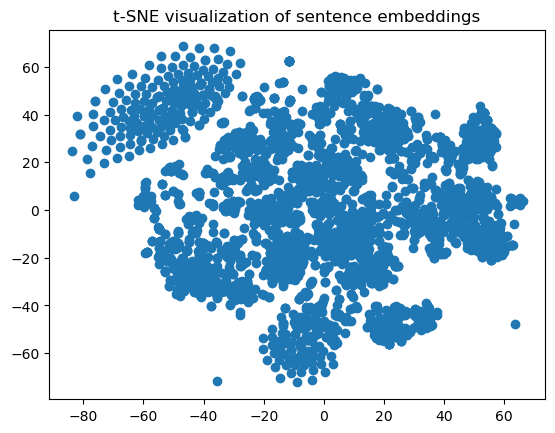

In [53]:
# Reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(test_embeddings)

# Plot the 2D embeddings
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('t-SNE visualization of sentence embeddings')
plt.show()

/Users/zaheerbabar/miniforge3/envs/NLP-transformer/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


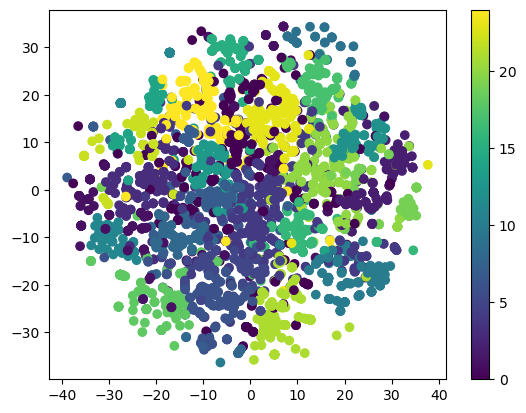

In [56]:
# # Apply t-SNE
# tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)
# embeddings_2d = tsne.fit_transform(embeddings)

# # Apply K-Means on the 2D embeddings
kmeans = KMeans(n_clusters=25, random_state=0).fit(test_embeddings)
labels = kmeans.labels_

# # Apply t-SNE on the original embeddings
tsne = TSNE(n_components=2, perplexity=5, n_iter=400, random_state=0)
embeddings_2d = tsne.fit_transform(test_embeddings)

# Plotting the result
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

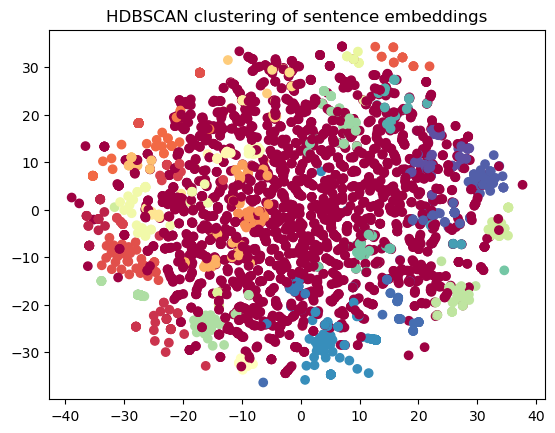

In [58]:

# Perform clustering
clusterer = HDBSCAN(min_cluster_size=10, cluster_selection_epsilon=0.3)
cluster_labels = clusterer.fit_predict(test_embeddings)

# Plot the clusters
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='Spectral')
plt.title('HDBSCAN clustering of sentence embeddings')
plt.show()


In [59]:
np.unique(cluster_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35])

In [60]:
unique_topics, counts = np.unique(cluster_labels, return_counts=True)

In [61]:
counts

array([2540,   10,   22,   31,   28,  129,   15,   32,   15,   29,   38,
         33,   16,   13,   14,   16,   16,   17,   13,   11,   39,   12,
         12,   23,   35,   69,   48,   12,   49,   11,   50,   11,  136,
         26,   53,   89,   78])

In [4]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import DBSCAN
# from sklearn import metrics
# from sklearn.datasets import make_blobs
# from sklearn.preprocessing import StandardScaler
# from sklearn import datasets
# from itertools import cycle, islice

# db = DBSCAN(eps=0.15, min_samples=3).fit(embeddings)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# labels
# # # Plot result
# unique_labels = set(labels)
# colors = list(islice(cycle(plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))), len(unique_labels)))

# for k, col in zip(unique_labels, colors):
#     if k == -1:
#         # Black used for noise.
#         col = [0, 0, 0, 1]

#     class_member_mask = (labels == k)

#     xy = X[class_member_mask & core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)

#     xy = X[class_member_mask & ~core_samples_mask]
#     plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
#              markeredgecolor='k', markersize=6)

# plt.title('Number of clusters: %d' % n_clusters_)
# plt.show()

In [5]:
# from transformers import BertTokenizer, BertModel
# import torch

# # Load pre-trained multilingual BERT model and tokenizer
# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
# model = BertModel.from_pretrained('bert-base-multilingual-cased')

# # Function to get embeddings
# def get_embeddings(text):
#     inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
#     outputs = model(**inputs)
#     return outputs.last_hidden_state.mean(dim=1)

# # Example Dutch texts
# text1 = "De snelle bruine vos springt over de luie hond."
# text2 = "Een snelle, donkergekleurde vos springt over een slaperige hond."

# # Get embeddings
# embeddings = get_embeddings(text1)




In [6]:
import torch.nn.functional as F
from torch import Tensor
from transformers import AutoTokenizer, AutoModel


/Users/zaheerbabar/miniforge3/envs/NLP-transformer/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# def average_pool(last_hidden_states: Tensor, attention_mask: Tensor) -> Tensor:
#     last_hidden = last_hidden_states.masked_fill(~attention_mask[..., None].bool(), 0.0)
#     return last_hidden.sum(dim=1) / attention_mask.sum(dim=1)[..., None]

# tokenizer = AutoTokenizer.from_pretrained('intfloat/multilingual-e5-large')
# model = AutoModel.from_pretrained('intfloat/multilingual-e5-large')

# batch_dict = tokenizer(train_phrases, max_length=20, padding=True, truncation=True, return_tensors='pt')


# # Get model outputs
# outputs = model(**batch_dict)

# # Pool the embeddings
# embeddings = average_pool(outputs.last_hidden_state, batch_dict['attention_mask'])

# # Normalize embeddings
# embeddings = F.normalize(embeddings, p=2, dim=1)
